In [17]:
import get_data
import numpy as np
import pandas as pd
import regression_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt

In [18]:
data = pd.read_csv('./insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
inspector = get_data.get('./insurance.csv')
by_row,by_feature = inspector.detect_missing_values()

In [20]:
by_feature

,missing count
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [21]:
outliers = inspector.modified_zScore()
outliers

,age,bmi,children,charges
0,1.124167,0.403409,0.6745,1.008357
1,1.180375,0.543795,0.0000,1.028999
2,0.618292,0.419545,1.3490,0.662917
3,0.337250,1.241693,0.6745,1.693715
4,0.393458,0.245273,0.6745,0.741217
...,...,...,...,...
1333,0.618292,0.091977,1.3490,0.163763
1334,1.180375,0.245273,0.6745,0.964431
1335,1.180375,1.040795,0.6745,1.041863
1336,1.011750,0.742273,0.6745,0.991047


In [22]:
# age outliers
outliers[outliers['age']>=3]

,age,bmi,children,charges


In [23]:
# charges outliers
outliers[outliers['charges']>=3]

,age,bmi,children,charges
14,0.674500,1.892795,0.6745,4.062749
19,0.505875,0.790682,0.6745,3.689896
23,0.281042,0.245273,0.0000,3.806069
29,0.449667,0.952045,0.6745,3.941691
30,0.955542,0.839091,0.6745,3.521647
...,...,...,...,...
1301,1.292792,0.076648,1.3490,5.017820
1303,0.224833,0.419545,0.6745,3.823251
1308,0.786917,0.032273,0.6745,3.295200
1313,1.124167,0.693864,0.6745,3.630776


In [24]:
# data.drop(outliers[outliers['charges']>=3].index,axis=0,inplace=True)

In [25]:
# children outliers
outliers[outliers['children']>=3]

,age,bmi,children,charges


In [26]:
# bmi outliers
outliers[outliers['bmi']>=3]

,age,bmi,children,charges
116,1.067958,3.011045,0.6745,0.268697
847,0.899333,3.224045,0.0000,0.933242
1047,0.955542,3.579045,0.0000,4.719896
1317,1.180375,3.667795,0.6745,1.104542


In [27]:
# data cleaning 1 for make more accuracy without outliers - ignore outliers (fail)

# data.drop([116,847,1317],axis=0,inplace=True)
# data

In [28]:
target = data['charges']
data = data.drop(labels='charges',axis=1)

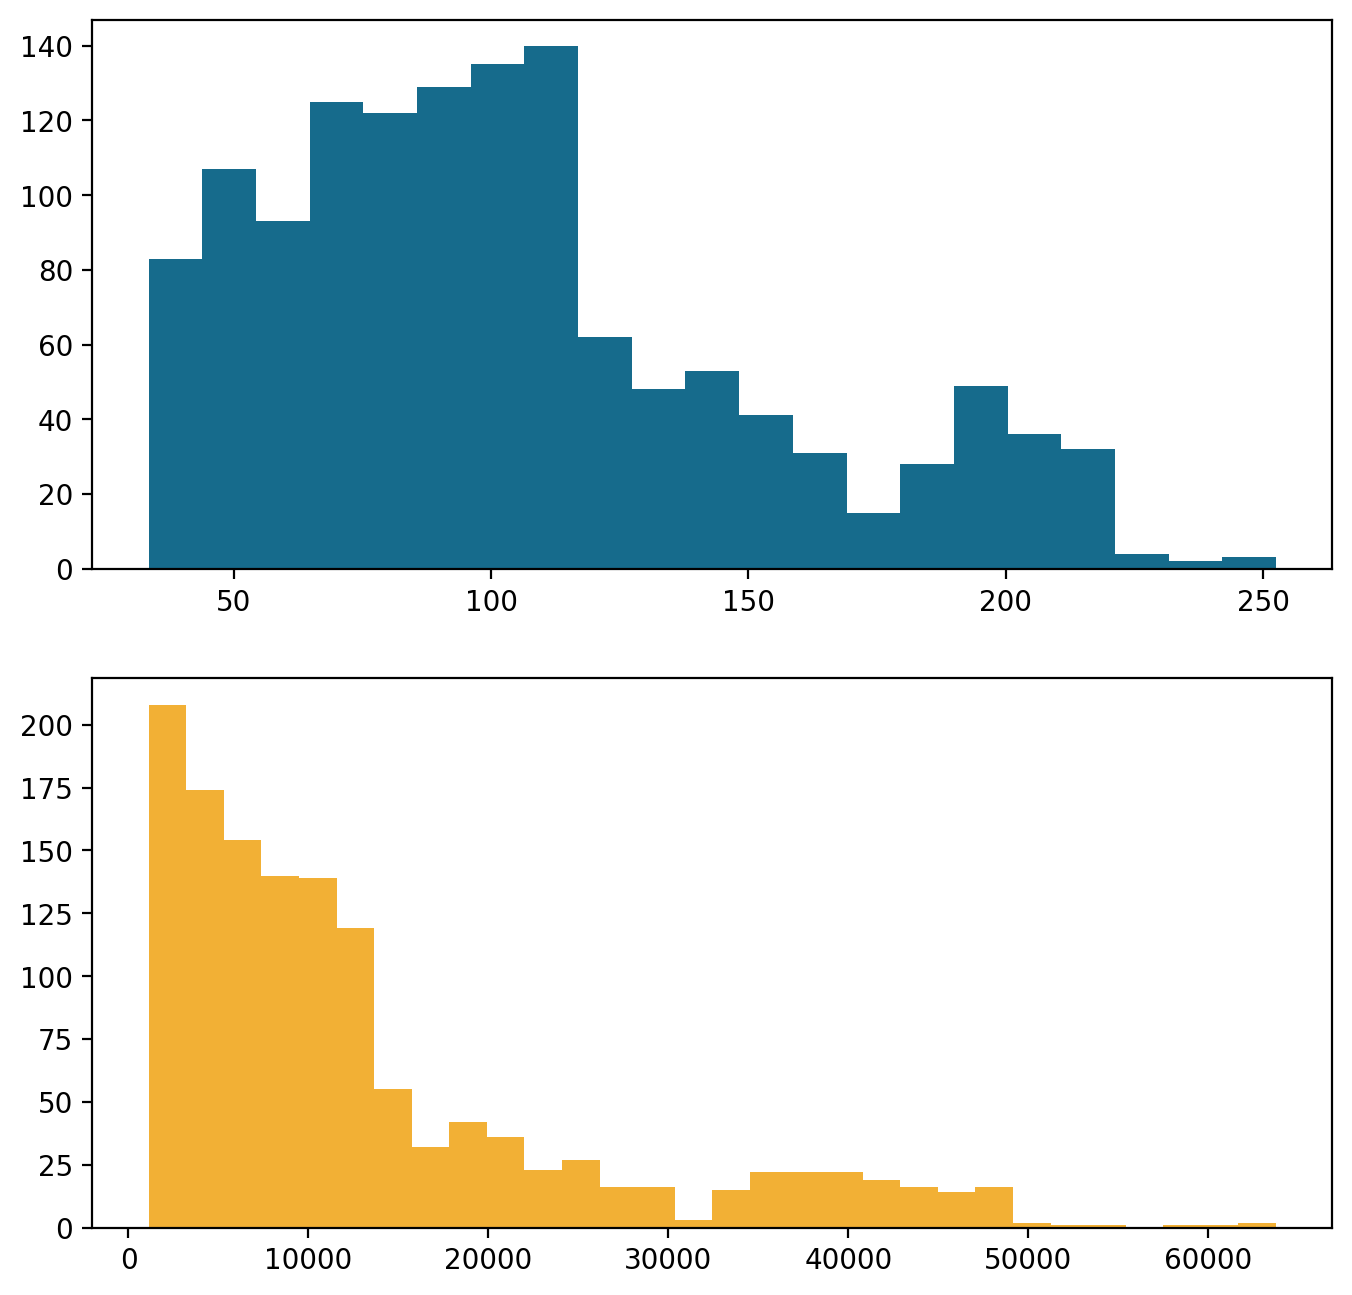

In [29]:
# data clean 2 - transform outliers
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=[8,8],dpi=200)
axs = axes.ravel()
axs[0].hist(np.sqrt(target),bins='auto',color='#166B8C')
axs[1].hist(target,bins='auto',color='#F2B035')
plt.show()

In [30]:
# target = np.log(target)

In [31]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [32]:
vfi = pd.DataFrame()
vfi['features'] = numeric_data.columns
vfi['VFI'] = [variance_inflation_factor(numeric_data.values,i) for i in range(numeric_data.shape[1])]
vfi.sort_values(by='VFI')

,features,VFI
2,children,1.796637
0,age,7.536550
1,bmi,7.846515


In [33]:
full = pd.get_dummies(data)
full.ndim

2

In [34]:
np.ones(full.shape[0]).reshape(-1,1)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [35]:
full = np.hstack([full,np.ones(full.shape[0]).reshape(-1,1)])
full.shape

(1338, 12)

In [36]:
train_x,test_x,train_y,test_y = train_test_split(full,target,test_size=0.2,random_state=42)
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((1070, 12), (1070,), (268, 12), (268,))

In [37]:
weights = regression_model.regression(train_x,train_y)
weights

array([   256.97570583,    337.09255195,    425.27878352,   -118.37875696,
         -136.9704486 , -11953.23903066,  11697.8898251 ,    395.74794285,
           25.07061663,   -262.11635371,   -414.05141133,   -255.34920556])

In [38]:
predict_1 = np.dot(test_x,weights)
predict_1

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084136, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

In [39]:
r2_score(test_y,predict_1)*100, mean_squared_error(test_y,predict_1)

(78.35929767120724, 33596915.851361446)

In [40]:
weights_gd,cost_history = regression_model.fit(np.sqrt(train_x),np.sqrt(train_y),0.001,10001)
weights_gd

array([ 15.74645111,   6.41794801,   4.10267011,  -0.40250128,
        -1.52602772, -44.4207607 ,  42.4922317 ,   1.58144123,
        -0.71585752,  -0.41115258,  -2.38296013,  -1.928529  ])

In [41]:
weights_ridge = regression_model.ridge_fit(np.sqrt(train_x),
                                           np.sqrt(train_y),
                                           0.001,
                                           0.01,
                                           10001)
weights_ridge

array([ 15.93370764,   7.391998  ,   4.04283139,  -1.36910847,
        -2.98501432, -47.37427284,  43.02015004,   1.20337634,
        -0.97388328,  -1.66896482,  -2.91465104,  -4.3541228 ])

In [42]:
weights_lasso = regression_model.lasso_fit(np.sqrt(train_x),
                                           np.sqrt(train_y),
                                           0.001,
                                           0.01,
                                           10001)
weights_lasso

array([ 15.8711086 ,   7.02819785,   4.02536733,  -0.72175711,
        -2.33318284, -46.73473632,  43.67980156,   1.97047393,
        -0.18341541,  -0.7622026 ,  -2.07988648,  -4.05488802])

In [43]:
# optimize alpha
# alpha = np.arange(0,1,0.01)
# alpha_hist = []
#
# for i in range(alpha.shape[0]):
#     w = regression_model.ridge_fit(np.sqrt(train_x),
#                                    np.sqrt(train_y),
#                                    0.01,
#                                    alpha[i],
#                                    10001)
#     alpha_hist.append(w)
#
# alpha_hist

In [44]:
# alpha_hist = np.asarray(alpha_hist)
#
# fig = plt.figure(figsize=[8,8],dpi=200)
# ax = fig.add_subplot(111)
# ax.plot(alpha_hist)
# plt.show()

In [45]:
predict_2 = np.dot(np.sqrt(test_x),weights_gd)
predict_2

array([ 98.46396551,  82.17532272, 198.69449287,  97.87685281,
       143.21899292,  87.69752616,  51.62268703, 116.89383798,
        64.83866496, 103.11650099, 161.70993724,  93.53389224,
        76.64847445, 194.29618471, 201.65281452, 192.43003391,
       110.79267658, 190.64811793,  97.72825121, 175.97926913,
        69.02365163,  95.4443382 ,  53.76503488,  69.17865932,
       105.0158918 , 107.23107523, 110.86003007,  76.84546798,
       101.68461938,  53.7545403 ,  93.39990553, 107.62143815,
        62.89487344,  74.55128551,  69.28840303,  99.82813569,
        60.1032371 ,  93.31821664, 188.62372222, 175.28532025,
        62.99881078,  65.30367572, 111.20414252, 104.74323103,
        86.34580446, 108.45118186,  67.7122727 ,  68.34083161,
       187.48058048,  84.95350148, 116.48844134,  57.4042231 ,
        97.52919109,  53.31647224, 107.20782667, 107.22014197,
        72.33660853, 170.73714448, 107.710771  , 106.47323829,
       112.04059419,  87.0299552 , 118.39260409,  92.46

In [46]:
r2_score(np.sqrt(test_y),predict_2)*100, mean_squared_error(np.sqrt(test_y),predict_2)

(80.27946220684301, 478.51448142368764)

In [47]:
predict_3 = np.dot(np.sqrt(test_x),weights_ridge)
predict_3

array([ 97.79898383,  82.03199258, 202.12075868,  96.88941033,
       145.9237043 ,  87.73962934,  50.45704504, 117.29270906,
        63.15597655, 102.44484322, 163.55503882,  92.93947384,
        75.29202725, 197.18691545, 204.71969833, 195.09296019,
       110.77878411, 193.64516616,  96.49371066, 179.13540587,
        67.21824655,  94.77932893,  52.58202472,  69.47859089,
       104.79783377, 107.45164149, 111.20389268,  76.48163986,
       101.18366382,  51.80062324,  92.85961972, 107.92642665,
        61.90131087,  73.22018463,  68.14869707, 100.01353187,
        59.02887101,  92.93508933, 191.57665834, 177.51354483,
        62.01295437,  64.47983985, 111.49624247, 104.00030945,
        85.06495367, 107.56786563,  67.53067646,  67.09764887,
       189.83224993,  83.85075322, 116.23981926,  55.32171757,
        98.31875487,  51.87340174, 106.22866259, 106.76298453,
        71.06094936, 173.77353331, 107.86343299, 106.72935461,
       112.14230568,  86.76363052, 118.23410858,  91.85

In [48]:
r2_score(np.sqrt(test_y),predict_3)*100, mean_squared_error(np.sqrt(test_y),predict_3)

(80.63569514256741, 469.87056814443866)

In [49]:
predict_4 = np.dot(np.sqrt(test_x),weights_lasso)
predict_4

array([ 97.88222289,  82.03970928, 202.13034092,  96.96976008,
       145.9966367 ,  87.39969906,  50.83454192, 116.93317765,
        63.66522747, 102.40884748, 163.83036327,  92.88290299,
        75.45138948, 196.88208168, 204.42510444, 194.88640198,
       110.43207389, 193.50972701,  96.61779665, 179.23529107,
        67.51303527,  94.69234074,  52.72867356,  69.24293668,
       104.77236344, 107.26513927, 110.98454661,  76.49685198,
       101.20672265,  52.03514349,  92.88043662, 107.77807531,
        61.95906099,  73.59872869,  68.24479112,  99.65604617,
        59.27619031,  92.93873143, 191.71742182, 177.47955523,
        62.17636222,  64.51287491, 111.25448818, 104.06488845,
        85.00280812, 107.58715245,  67.485977  ,  67.3819383 ,
       189.72710072,  83.72079008, 116.04396262,  55.56445126,
        97.94061171,  52.10603896, 106.12290611, 106.59184641,
        71.24012138, 173.66250084, 107.71454328, 106.52907297,
       112.0148052 ,  86.50002488, 117.95448266,  91.98

In [50]:
r2_score(np.sqrt(test_y),predict_4)*100, mean_squared_error(np.sqrt(test_y),predict_4)

(80.58677872093448, 471.0575142803046)

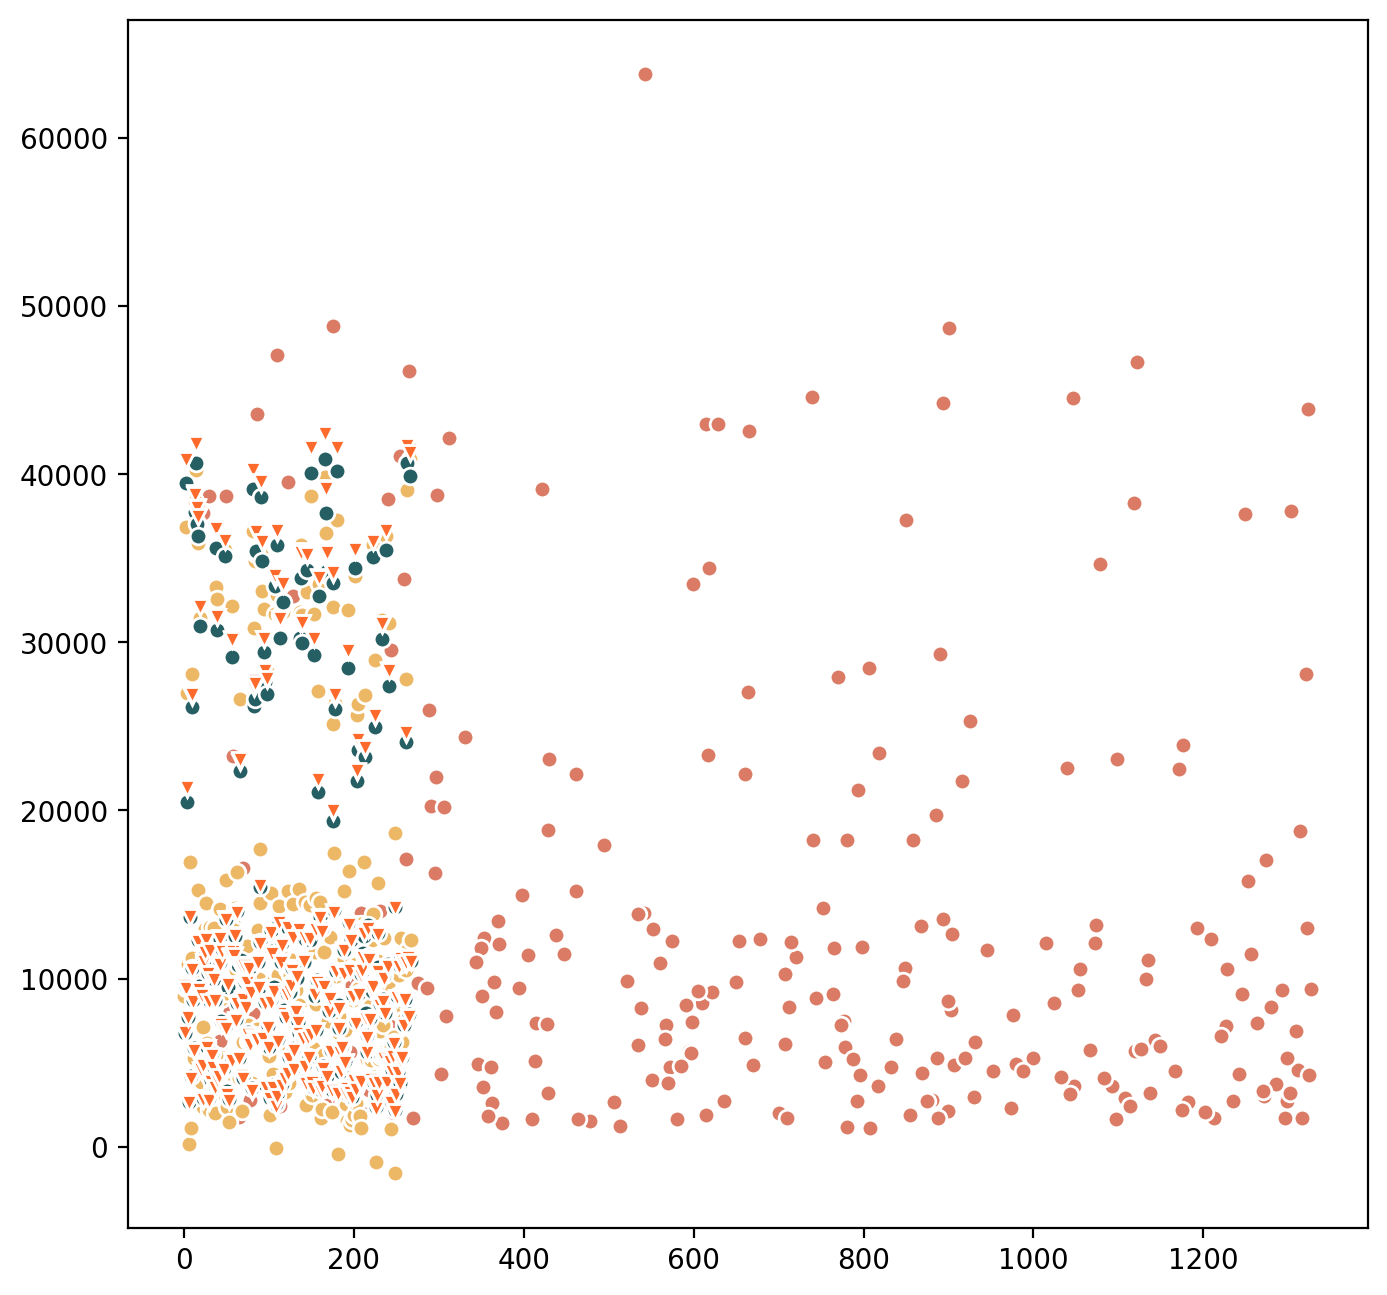

In [51]:
plt.figure(figsize=[8,8],dpi=200)
plt.plot(test_y,'o',color='#DB7B65',markeredgecolor='w')
plt.plot(predict_1,'o',color='#ECB865',markeredgecolor='w')
plt.plot(np.square(predict_2),'o',color='#255E63',markeredgecolor='w')
plt.plot(np.square(predict_3),'v',color='#CF455C',markeredgecolor='w')
plt.plot(np.square(predict_4),'v',color='#FE6A2C',markeredgecolor='w')
plt.show()

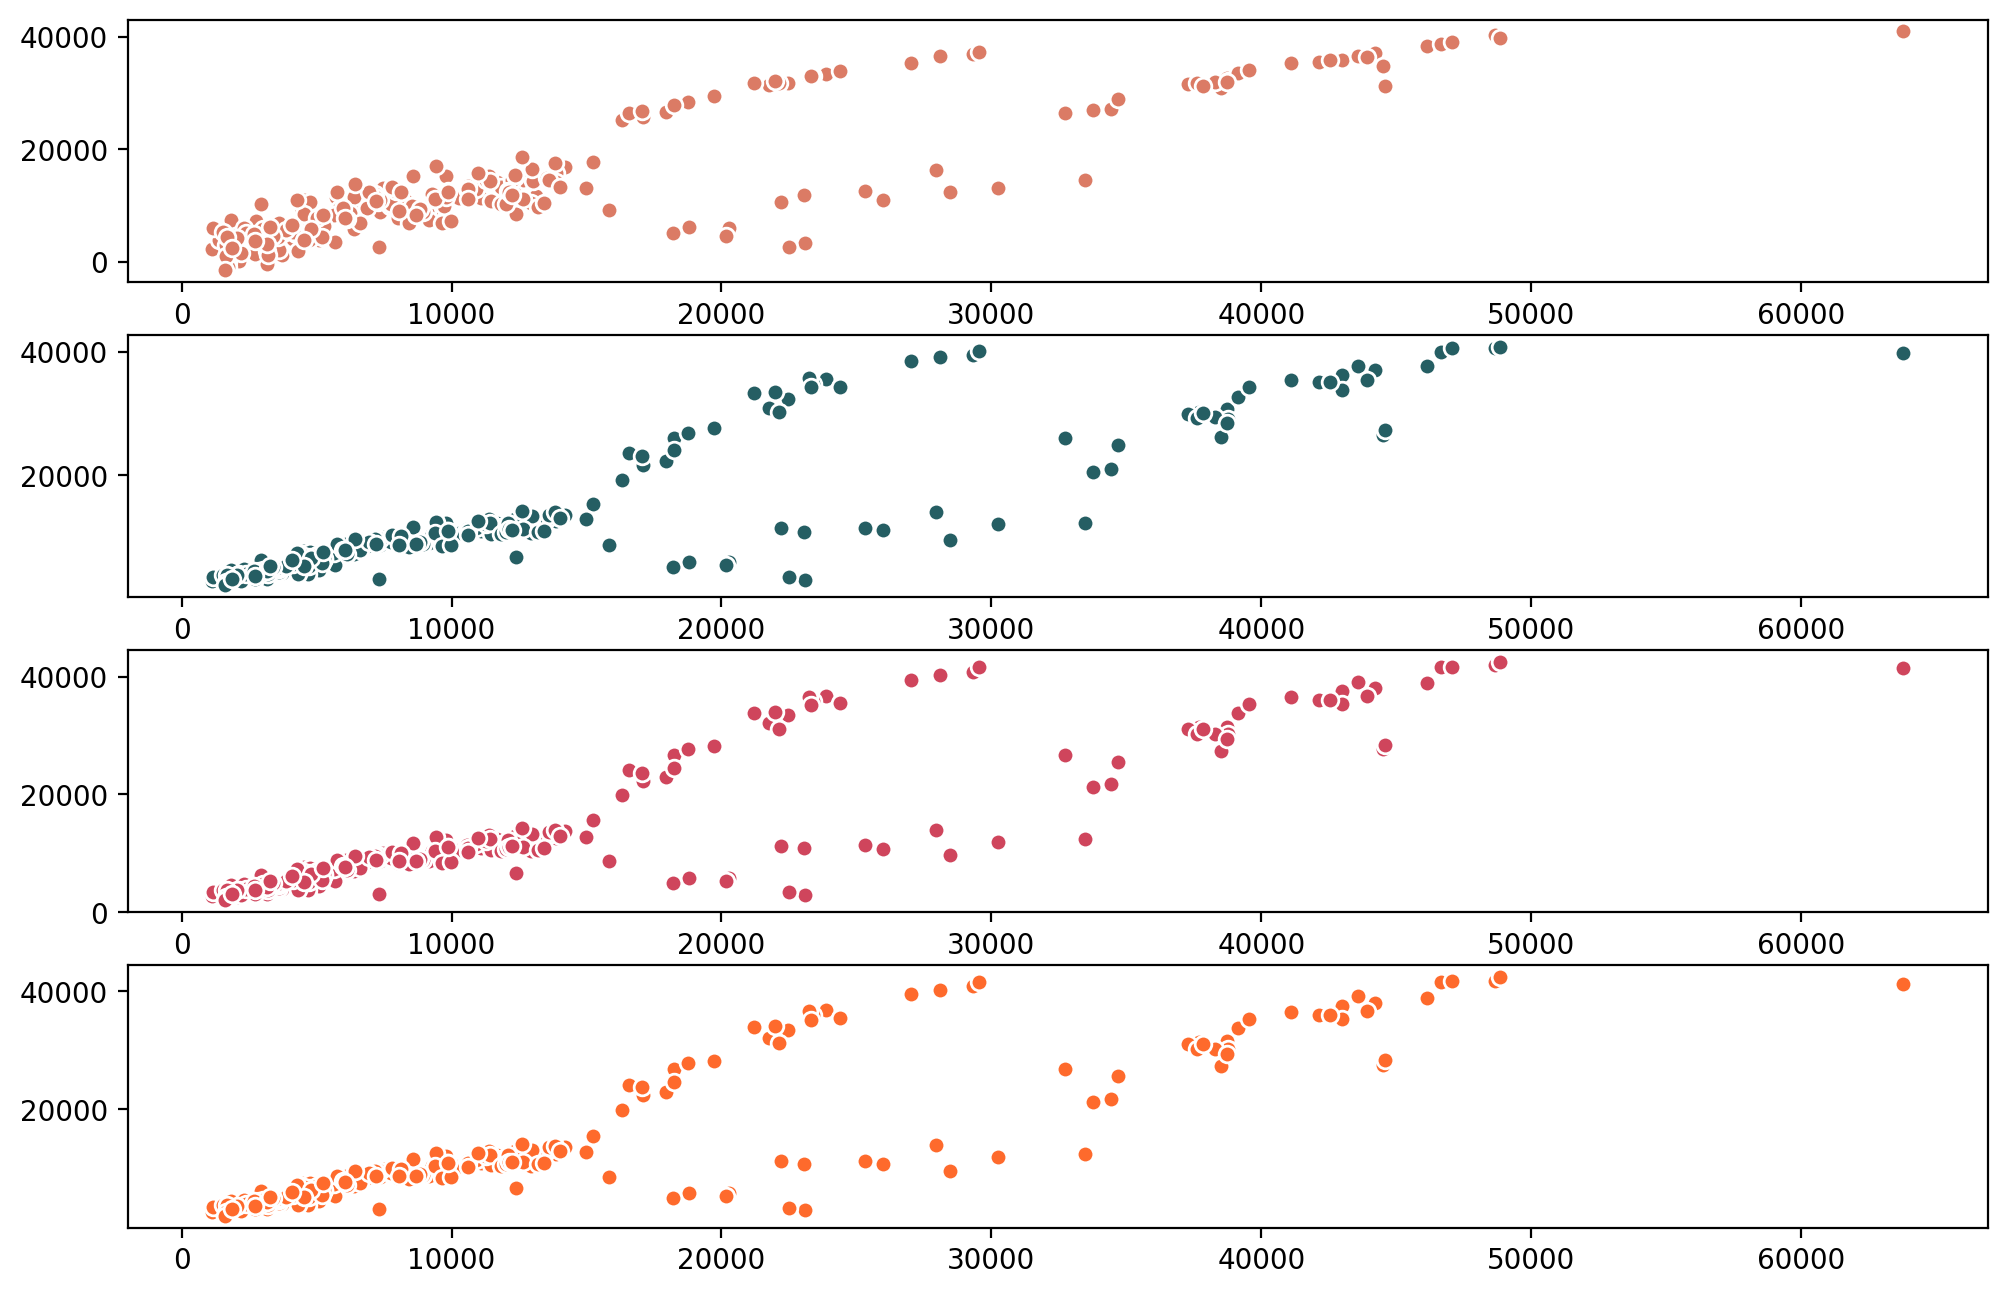

In [64]:
fig,axes = plt.subplots(nrows=4,ncols=1,figsize=[12,8],dpi=200)
axs = axes.ravel()
axs[0].scatter(test_y,predict_1,color='#DB7B65',edgecolor='w')
axs[1].scatter(test_y,np.square(predict_2),color='#255E63',edgecolors='w')
axs[2].scatter(test_y,np.square(predict_3),color='#CF455C',edgecolors='w')
axs[3].scatter(test_y,np.square(predict_4),color='#FE6A2C',edgecolors='w')
plt.show()

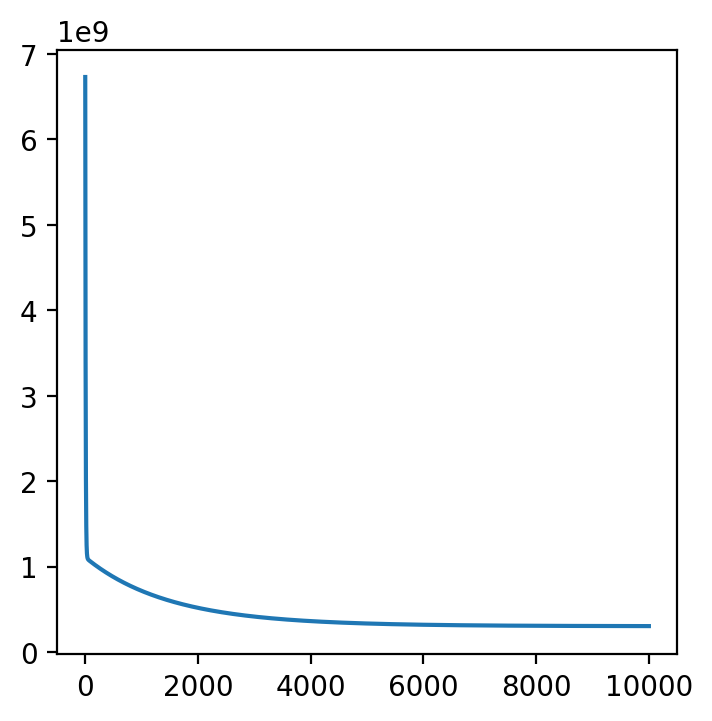

In [53]:
plt.figure(figsize=[4,4],dpi=200)
plt.plot(cost_history)
plt.show()

In [54]:
X = pd.get_dummies(data)
Y = target

train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size=0.2,random_state=42)
train_X.shape,train_Y.shape,test_X.shape,test_Y.shape

((1070, 11), (1070,), (268, 11), (268,))

In [55]:
model_lr = LinearRegression()
model_lr.fit(train_X,train_Y)
model_lr.coef_,model_lr.intercept_

(array([ 2.56975706e+02,  3.37092552e+02,  4.25278784e+02,  9.29584582e+00,
        -9.29584582e+00, -1.18255644e+04,  1.18255644e+04,  4.59585244e+02,
         8.89079180e+01, -1.98279052e+02, -3.50214110e+02]),
 -574.5357125101946)

In [56]:
model_r = Ridge(alpha=0.5)
model_r.fit(train_X,train_Y)
model_r.coef_,model_r.intercept_

(array([ 2.56927434e+02,  3.37045991e+02,  4.25347587e+02,  8.29708823e+00,
        -8.29708823e+00, -1.18084788e+04,  1.18084788e+04,  4.58924561e+02,
         8.79431149e+01, -1.96595436e+02, -3.50272239e+02]),
 -581.4084462440642)

In [57]:
model_l = Lasso(alpha=0.5)
model_l.fit(train_X,train_Y)
model_l.coef_,model_r.intercept_

(array([ 2.56974776e+02,  3.36992081e+02,  4.24983089e+02,  1.62840410e+01,
        -5.95348054e-15, -2.36477687e+04,  2.19806509e-12,  6.53476516e+02,
         2.82645738e+02, -0.00000000e+00, -1.52196505e+02]),
 -581.4084462440642)

In [58]:
p_lr = model_lr.predict(test_X)
r2_score(test_Y,p_lr)*100

78.35929767120723

In [59]:
p_r = model_r.predict(test_X)
r2_score(test_Y,p_r)*100

78.35198730020471

In [60]:
p_l = model_l.predict(test_X)
r2_score(test_Y,p_l)*100

78.35639583407871

# use polynomial functions

In [66]:
transform_x = PolynomialFeatures(2)
X_train_poly = transform_x.fit_transform(train_x)
X_test_poly = transform_x.fit_transform(test_x)

In [78]:
poly_weight = regression_model.regression(X_train_poly,train_y)
poly_weight_gd,cost = regression_model.fit(np.log10(X_train_poly+0.0001),np.log10(train_y+0.0001),0.001,10001)
poly_weight_r = regression_model.ridge_fit(np.log10(X_train_poly+0.0001),np.log10(train_y+0.0001),0.001,0.01,10001)
poly_weight_l = regression_model.lasso_fit(np.log10(X_train_poly+0.0001),np.log10(train_y+0.0001),0.001,0.01,10001)

In [79]:
predict_poly = np.dot(X_test_poly,poly_weight)
predict_gd_poly = np.dot(np.log10(X_test_poly+0.0001),poly_weight_gd)
predict_r_poly = np.dot(np.log10(X_test_poly+0.0001),poly_weight_r)
predict_l_poly = np.dot(np.log10(X_test_poly+0.0001),poly_weight_l)

In [86]:
r2_score(test_y,predict_poly)*100,mean_squared_error(test_y,predict_poly)

(86.6583090316484, 20712805.987918362)

In [87]:
r2_score(np.log10(test_y+0.0001),predict_gd_poly)*100,mean_squared_error(np.log10(test_y+0.0001),predict_gd_poly)

(80.3362448461503, 0.03334745580755975)

In [88]:
r2_score(np.log10(test_y+0.0001),predict_r_poly)*100,mean_squared_error(np.log10(test_y+0.0001),predict_r_poly)

(81.28809075664527, 0.03173323516722477)

In [89]:
r2_score(np.log10(test_y+0.0001),predict_l_poly)*100,mean_squared_error(np.log10(test_y+0.0001),predict_l_poly)

(52.45743375127937, 0.08062669691281243)

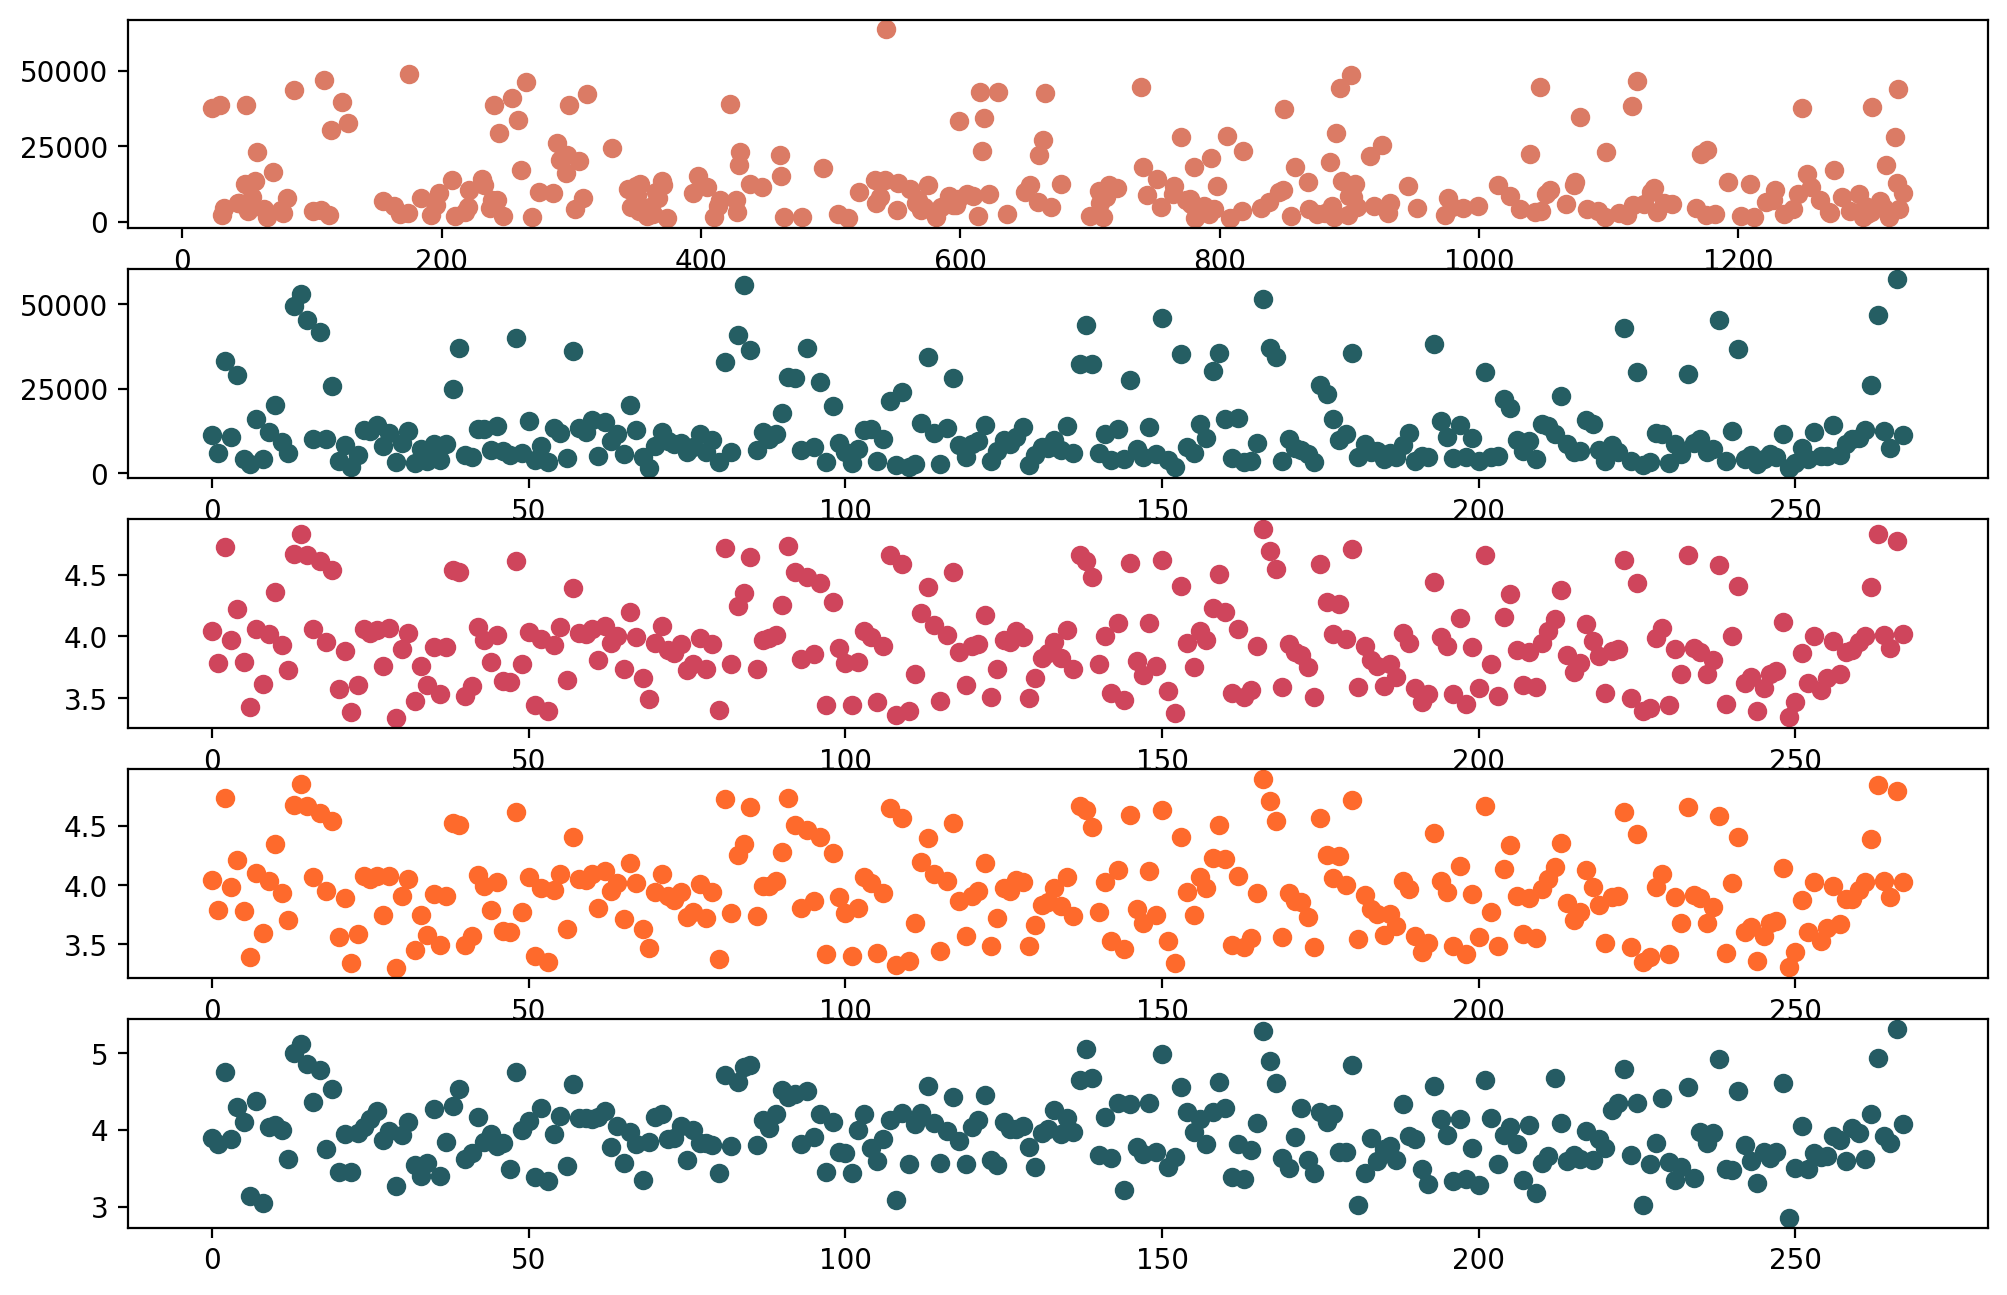

In [91]:
fig,axes = plt.subplots(nrows=5,ncols=1,figsize=[12,8],dpi=200)
axs = axes.ravel()
axs[0].plot(test_y,'o',color='#DB7B65')
axs[1].plot(predict_poly,'o',color='#255E63')
axs[2].plot(predict_gd_poly,'o',color='#CF455C')
axs[3].plot(predict_r_poly,'o',color='#FE6A2C')
axs[4].plot(predict_l_poly,'o',color='#255B63')
plt.show()